In [118]:
import pandas as pd
import numpy as np
import random
from random import *

In [ ]:
ch

In [3]:
dict_nuc = {1:"A", 2:"T", 3:"C", 4:"G"}

In [886]:
def random_mutate_pat(base_string, num_muts = 1):
    mut_pos = [randint(0,len(base_string)-1) for _ in range(num_muts)]
    new_string = list(base_string)
    for x in mut_pos:
        new_string[x] = choice(list(set(["A","C","G","T"])-set(new_string[x])))
    return ''.join(new_string)

In [887]:
def make_pat(num_patterns, len_pattern):
    set_pats = set()
    dict_nuc = {1:"A", 2:"T", 3:"C", 4:"G"}
    
    while len(set_pats) != num_patterns:
        s_temp = ''.join(pd.Series(np.random.randint(low=1, high=5, size=len_pattern)).map(dict_nuc).values)
        set_pats.add(s_temp)
    return set_pats
        

In [888]:
make_pat(5,3)

{'ATA', 'CAA', 'CAG', 'TCG', 'TGA'}

In [889]:
def add_pats_to_str(pat, string, gap = 1, num_muts = 0):
    locs = np.random.choice(np.arange(0,len(string) - len(pat[0]), len(pat[0])+gap ), size=len(pat), replace=False)
    locs = sorted(locs)
#     print(locs)
    for i in range(len(locs)):
#         random_mutate(, param)
        string = string[:locs[i]] + random_mutate_pat(pat[i], num_muts) + string[locs[i]+len(pat[i]):]
    return string, locs

In [903]:
random_mutate_pat("AAA", )

'AAT'

In [895]:
add_pats_to_str(["AAT", "TAC", "ATG"], "00000000000000000")

('AAT00000TAC0ATG00', [0, 8, 12])

In [891]:
def make_str_without_pats(pat, len_string):
    string = ""
    dict_nuc = {1:"A", 2:"T", 3:"C", 4:"G"}
    s_temp = ''.join(pd.Series(np.random.randint(low=1, high=5, size=len_string)).map(dict_nuc).values)
    locs = [s_temp.find(x) for x in pat]
    locs = list(filter((-1).__ne__, locs)).copy()
    kkk = 2
    while len(locs) != 0:
        for idx in locs:
            list_nuc = ["A","T", "C", "G"]
            list_nuc.remove(s_temp[idx])
            s_temp = s_temp[:idx] + np.random.choice(list_nuc, size=1)[0] + s_temp[idx+1:] 
        locs = [s_temp.find(x) for x in pat]
        locs = list(filter((-1).__ne__, locs)).copy()
        kkk -=1
    return s_temp


In [892]:
make_str_without_pats(["AAT", "ACT", "TTT"], 40)

'CCAGTTCATACACCTATTGAGTTCTATGCAGTGACAGCCT'

In [909]:
df = pd.DataFrame(columns = ["String", "Patterns", "Location", "Exclusion"])

num_strings = 5
len_strings = 80
len_pattern = 20
num_patterns= 1
num_muts = int(0.1 * len_pattern)
pats = make_pat(num_patterns, len_pattern)
pats = list(pats)
while len(df) != num_strings:
    st = make_str_without_pats(pats, len_strings) 
    st, locs = add_pats_to_str(pats, st, num_muts = num_muts) 
    new_row = {"String" : st, "Patterns": pats, "Location": locs}
    df = df.append(new_row, ignore_index=True)
    df.drop_duplicates("String",inplace= True)


/var/folders/_8/tqnhz5dn2q77dh1l3q_btskc0000gn/T/ipykernel_2510/3786936537.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/_8/tqnhz5dn2q77dh1l3q_btskc0000gn/T/ipykernel_2510/3786936537.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/_8/tqnhz5dn2q77dh1l3q_btskc0000gn/T/ipykernel_2510/3786936537.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/var/folders/_8/tqnhz5dn2q77dh1l3q_btskc0000gn/T/ipykernel_2510/3786936537.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df 

In [873]:
df

String                Patterns  \
0  CGCCCCGTCCTCCACCAAGCCGCGACCCTCACAACTTGCCCACTCG...  [CGCCCCGTCCGCCACCAAGC]   
1  CTGGTTAAAAGTCCAAGAGTTCGCCCCGTCCGACACCAAGCCACGA...  [CGCCCCGTCCGCCACCAAGC]   
2  CCAGGCCCTGCCAATGCAGTGCACGGAGAGTTTGGCGTACATCGCC...  [CGCCCCGTCCGCCACCAAGC]   
3  CCTCCCGAAAACTGGCCGACAACGTCAACGAAGATCGGTGTACGCC...  [CGCCCCGTCCGCCACCAAGC]   
4  GGCTTTATTCGACAACACATATGCCCCGTCCGCCACCAAGCCATTA...  [CGCCCCGTCCGCCACCAAGC]   

  Location Exclusion  
0      [0]       NaN  
1     [21]       NaN  
2     [42]       NaN  
3     [42]       NaN  
4     [21]       NaN

In [910]:
df["String"].values

array(['TCGCGGACCGACCCGTTGCAAAAGATTTGCTGCAGACCCATGTACTTTAGGTCTAAAAGCACTTCTGAAGAAAAGAATCT',
       'ACTTCTCTGGGGCGGTCTCATGCGCGGTCCCACCCGTTCCAGACCGAGCGTTTCAGTATAGGTTTAGATTAATTCGTTAG',
       'TCCTAGTCCCCGATTCATCGCGCCGAGCATTTGTGGCTTATATCGCGTTTCGACCCGTTCCATTCAACGTATACGACGAA',
       'TCGCGGTCCAACTCGTTCCAGAGGACAGGAGCGAGCGCGCCGGCCGCCGTATGTGCCTACTTGAAGGAAACTTGTGGTGC',
       'GACTCGGTCAGGTTAACTTTGCTGTGGTCTGCGCCTAAGTGCCCGCGGTCCTACCCGTTCCAAAACGGAATTCGACGTGG'],
      dtype=object)

In [875]:
# GibbsSampler(df["String"].values, part_index_list, lmin_rand, len(df), min(df["String"].str.len()) )

In [978]:
def Score2(dna_list, motiff):
    st, end = motiff[0]
    k = end - st
    median_str =  median_string(dna_list, motiff)
#     print(median_str)
    score = []
    for i, (mot_st, mot_end) in enumerate(motiff):
            score.append(HammingDistance(median_str, dna_list[i][mot_st:mot_end]))
    
    return 1 - (max(score)/k)


In [916]:
# %%time
# for parrrt in range(0,len(df["String"].values[0])-40, 20):


part_index_list= [(0, 0 + len_strings) for _ in range(len(df))]
st0, end0 = part_index_list[0]
len_part = end0-st0
best_motifs = []
min_score = 100
count = 0
ctt = 0
flg = 0
while count < 10000:
#     lmin_rand = choices(list(range(len_pattern, len_part)), weights=1/np.arange(len_pattern, len_part)**3)[0]    
#     while ctt < 10000:

    motifs = GibbsSampler(df["String"].values, part_index_list, len_pattern, len(df), 500 )
    ss = Score(df["String"].values,motifs)
    if ss == min_score:
        flg +=1
    if flg == 5:
        break
    if ss < min_score:
        best_motifs = motifs
        min_score = ss
        print(ss)
#         ctt +=1
    count += 1

a, b = best_motifs[0]
print(df["String"].values[0][a:b])
print(best_motifs)
print(Score2(df["String"].values,best_motifs))

20
11
10
TCGCGGACCGACCCGTTGCA
[(0, 20), (21, 41), (42, 62), (0, 20), (42, 62)]
TCGCGGTCCGACCCGTTCCA
0.9


In [917]:
print(Score2(df["String"].values,best_motifs))

TCGCGGTCCGACCCGTTCCA
0.9


In [919]:
print(df["Patterns"][0][0])
for i in range(len(df["String"].values)):
    (st, end) = best_motifs[i]
    print(df["String"].values[i][st:end], HammingDistance(df["Patterns"][0][0],df["String"].values[i][st:end] ))
print()
print(median_string(df["String"].values,best_motifs))
for i in range(len(df["String"].values)):
    (st, end) = best_motifs[i]
    print(df["String"].values[i][st:end], HammingDistance("TCGCGGTCCGACCCGTTCCA",df["String"].values[i][st:end] ))

TCGCGGTCCGACCCGTTCCA
TCGCGGACCGACCCGTTGCA 2
GCGCGGTCCCACCCGTTCCA 2
TCGCGTTTCGACCCGTTCCA 2
TCGCGGTCCAACTCGTTCCA 2
CCGCGGTCCTACCCGTTCCA 2

TCGCGGTCCGACCCGTTCCA
TCGCGGACCGACCCGTTGCA 2
GCGCGGTCCCACCCGTTCCA 2
TCGCGTTTCGACCCGTTCCA 2
TCGCGGTCCAACTCGTTCCA 2
CCGCGGTCCTACCCGTTCCA 2


In [ ]:
pd.DataFrame(Profile_creator(df["String"].values, best_motifs, 0)).T

In [517]:
# choices(siz_range, map(lambda y: (len(x)-y)**4, siz_range))

In [479]:
len_pattern

4

In [255]:
# # questions
# 1. How approx is the sol
# 2. Explain exclusion string -> still not clear
# 3. Order vs approx sol

In [256]:
# Make pattern of different lengs
# Make mutations in patterns 
# 

In [326]:
1 - HammingDistance("ACGTT","ACCTT")/len("ACCTT")

0.19999999999999996

In [858]:
from random import *
import pandas as pd
from collections import Counter

def minmax(l):
    '''
    inputs:
        l: iterable, but basically I envision this being a list
    outputs:
        tuple of (min_value,max_value)
    '''
    lo = min(l)
    hi = max(l)
    return (lo,hi)


def median_string(I, index_list):
    '''
    inputs:
        I: inclusion
        index_list: a list of start/stop coordinates corresponding to strings in I
    return:
        a string containing the most frequently occuring character at each position across I substrings
        
    errors:
    
    '''
    assert all([min(x)>=0 for x in index_list]), 'error provided index_list must not contain negative values'
    mm = minmax([x[1]-x[0] for x in index_list])
    assert mm[0]==mm[1], 'error provided index_list must define equal length substrings of I'
    

    patterns = [I[i][start:stop] for i,(start,stop) in enumerate(index_list)]

    return ''.join([Counter([x[i] for x in patterns]).most_common()[0][0] for i in range(len(patterns[0]))])


def ProfileProb(seq, k, prob_dic):
    minn = 0
    min_pat = []
    for i in range(len(seq) - k + 1):
        pat = seq[i:i+k]
        seq_sum = 0
        for j in range(k):
            seq_sum += prob_dic[pat[j]][j]
        if minn < seq_sum:
            minn = seq_sum
            min_pat = pat
    return min_pat

def Score(dna_list, motiff):
    st, end = motiff[0]
    k = end - st
    score_mat = {"A": [0]*k, "C": [0]*k, "G": [0]*k, "T": [0]*k}
    for indx, (st_nei,end_nei) in enumerate(motiff):
        idx = 0
        for nuc in str(dna_list[indx][st_nei:end_nei]):
            score_mat[nuc][idx] +=1
            idx+=1
    score = 0
    smat = list(zip(*score_mat.values()))
    for i in range(k):
            score = score + sum(smat[i]) - max(smat[i])
    return score

def Profile_creator(dna_list, motiff, initi = 1):
    st, end = motiff[0]
    k = end - st
    profile_matrix = {"A": [initi]*k, "C": [initi]*k, "G": [initi]*k, "T": [initi]*k}
    for indx, (st_nei,end_nei) in enumerate(motiff):
        idx = 0
        for nuc in str(dna_list[indx][st_nei:end_nei]):
            profile_matrix[nuc][idx] +=1
            idx+=1
    for j in range(k):
        col_sum =0
        for i in ["A", "C", "G", "T"]:
            col_sum += profile_matrix[i][j]
        for i in ["A", "C", "G", "T"]:
            profile_matrix[i][j] = profile_matrix[i][j]/col_sum
    return profile_matrix

def RandomMotif(seq, allowed_idx, k, prob_dic):
    allowed_idx_st, allowed_idx_end = allowed_idx
    rand_dic = {}    
    for i in range(allowed_idx_st, allowed_idx_end - k +1):
        pat = seq[i:i+k]
        seq_sum = 1
        for j in range(k):
            seq_sum *= prob_dic[pat[j]][j]
        rand_dic[(i,i+k)] = seq_sum
        
    keey = choices(list(rand_dic.keys()), weights=list(rand_dic.values()))  
    return keey[0]

def GibbsSampler(dna_list, part_index_list, k, t, N):
    motiff = []
    for i, (part_st, part_end) in enumerate(part_index_list):     
        rand = randint(part_st, part_end - k)
        motiff.append((rand, rand + k))      
        
    best_motif = motiff
    flg = 0
    count = 0
    for j in range(N):
        i = randint(0,t-1)

        prof = Profile_creator(dna_list, best_motif[:i] + best_motif[i+1:])
        ith_motif_st, ith_motif_end = RandomMotif(dna_list[i], part_index_list[i], k, prof)

        motiff = best_motif[:i] + [(ith_motif_st,ith_motif_end)] + best_motif[i+1:]
        if Score(dna_list, motiff) < Score(dna_list, best_motif):
            best_motif = motiff.copy()
    return best_motif

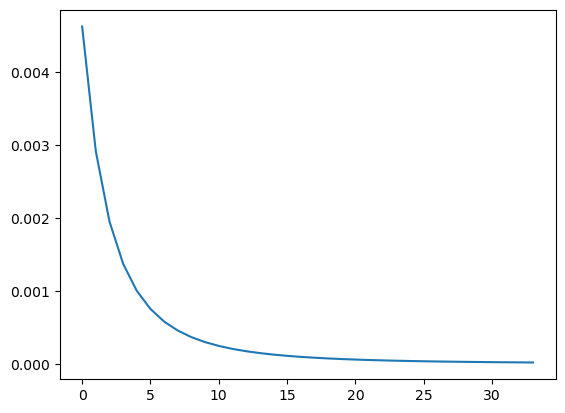

In [527]:
import matplotlib.pyplot as plt

plt.plot(1/np.array(list(range(6,40)))**3)

In [ ]:
[(1/x) * np.exp()]

In [497]:
np.arange(4,9)

array([4, 5, 6, 7, 8])

In [928]:
with open("Test one length 10 pattern.txt") as f: 
        lines = f.readline().strip()


In [991]:
import time

In [998]:
%%time
not_working = []
with open("Test one length 10 pattern.txt") as f:
    for teeee in range(100):
        test = []
        num_str = 5
        for tem in range(num_str):
            test.append(f.readline().strip())
        expected = f.readline().strip()
        part_index_list= [(0, len(test[0])) for _ in range(num_str)]
        st0, end0 = part_index_list[0]
        len_part = end0-st0
        best_motifs = []
        min_score = 0
        count = 0
        ctt = 0
        flg = 0
        while count < 100:
            lmin_rand = 10    
            flg = 0
            while ctt < 100:
                motifs = GibbsSampler(test, part_index_list, 10, len(test), 500 )
                ss = Score2(test,motifs)                
                if ss >= min_score:
                    best_motifs = motifs
                    min_score = ss
                ctt +=1
            count += 1
            lmin_rand = choices(np.arange(10, len(test[0])), weights=1/np.arange(10, len(test[0]))**4)[0] 

        if str(best_motifs).replace("[","").replace("]","").replace("),",")") == expected:
            print("PASSS!!!")
        else:
            not_working.append(teeee)
            print("NOOOOOOOOOOOOOOOOOOOOOOOOOOO")
            print(best_motifs)
            print(expected)
            print(Score2(test, best_motifs))

PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
NOOOOOOOOOOOOOOOOOOOOOOOOOOO
[(16, 26), (32, 42), (9, 19), (30, 40), (28, 38)]
(17, 27) (33, 43) (10, 20) (31, 41) (29, 39)
0.9
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
NOOOOOOOOOOOOOOOOOOOOOOOOOOO
[(4, 14), (23, 33), (26, 36), (34, 44), (32, 42)]
(5, 15) (24, 34) (27, 37) (35, 45) (33, 43)
0.8
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
NOOOOOOOOOOOOOOOOOOOOOOOOOOO
[(38, 48), (17, 27), (35, 45), (32, 42), (27, 37)]
(38, 48) (17, 27) (35, 45) (32, 42) (9, 19)
0.9
NOOOOOOOOOOOOOOOOOOOOOOOOOOO
[(38, 48), (20, 30), (12, 22), (5, 15), (13, 23)]
(37, 47) (19, 29) (11, 21) (4, 14) (12, 22)
0.9
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASSS!!!
PASS

In [1008]:
(not_working)

[8, 15, 29, 30, 59, 60, 69, 73, 95]

In [971]:
np.arange(10, len(test[0]))

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

In [1010]:
def hamming_distance(s1,s2):
    assert len(s1)==len(s2), 'strings must be same length'
    return sum([1 for i in range(len(s1)) if s1[i]!=s2[i]])


In [1019]:
validate(test, [], 0.9, 10, [best_motifs])

True

In [1018]:
def validate(I,E,match,lmin,answer):
    ret = True
    
    #match criteria
    for i in range(len(answer)):
        cur = answer[i]
        temp = [I[i][start:stop] for i,(start,stop) in enumerate(cur)]
        med = median_string(I,cur)
        cur_match = 1-max([hamming_distance(x,med)/len(med) for x in temp])>=match
        if cur_match<match:
            print("error, pattern {i} does not meet match criteria".format(i=i))
            ret = False

    #no overlap
    for i in range(len(answer)-1):
        prev = answer[i]
        cur = answer[i+1]
        for j in range(len(prev)):
            gap = cur[j][0]-prev[j][1]
            if gap<1:
                print("error, patterns {i} and {k} do not meet gap criteria in string I[{j}]".format(i=i,j=j,k=i+1))
                ret = False

    #excluded criteria
#     excluded_dic = get_excluded_dic(E,lmin)
#     for i,cur in answer:
#         med = median_string(I,cur)
#         if is_excluded(cur,lmin,E,excluded_dic):
#             print("error, pattern {i} does not meet exclusion criteria")
#             ret = False
    return ret


In [1014]:
import random
from collections import Counter
random.seed(666, 2)
import bisect
import networkx as nx
from itertools import product
from functools import reduce

def validate(I,E,match,lmin,answer):
    ret = True
    
    #match criteria
    for i in range(len(answer)):
        cur = answer[i]
        temp = [I[i][start:stop] for i,(start,stop) in enumerate(cur)]
        med = median_string(I,cur)
        cur_match = 1-max([hamming_distance(x,med)/len(med) for x in temp])>=match
        if cur_match<match:
            print("error, pattern {i} does not meet match criteria".format(i=i))
            ret = False

    #no overlap
    for i in range(len(answer)-1):
        prev = answer[i]
        cur = answer[i+1]
        for j in range(len(prev)):
            gap = cur[j][0]-prev[j][1]
            if gap<1:
                print("error, patterns {i} and {k} do not meet gap criteria in string I[{j}]".format(i=i,j=j,k=i+1))
                ret = False

    #excluded criteria
    excluded_dic = get_excluded_dic(E,lmin)
    for i,cur in answer:
        med = median_string(I,cur)
        if is_excluded(cur,lmin,E,excluded_dic):
            print("error, pattern {i} does not meet exclusion criteria")
            ret = False
    return ret

def get_pattern_list(sstarts,pattern_dic):
    
    def get_groups(pi,sstarts):
        insertion_points = [bisect.bisect_left(pi,x) for x in sstarts] + [len(pi)]

        return [pi[insertion_points[i]:insertion_points[i+1]] for i in range(len(sstarts))]

    def get_nodes(pi,sstarts,pattern):
        temp =  product(*get_groups(pi,sstarts))
        return [(*x,pattern) for x in temp]

    def connect_nodes(graph):
        for i in range(len(graph.nodes)):
            for j in range(i+1,len(graph.nodes)):
                n1 = list(graph.nodes)[i]
                n2 = list(graph.nodes)[j]

                if all([n1[i]+len(n1[-1])+1<n2[i] for i in range(len(n1)-1)]):
                    graph.add_edge(n1,n2)
                elif all([n1[i]>n2[i]+len(n2[-1])+1 for i in range(len(n1)-1)]):
                    graph.add_edge(n1,n2)

    def add_nodes(graph, pi,sstarts,pattern):
        graph.add_nodes_from(get_nodes(pi,sstarts,pattern) )
        
    graph = nx.DiGraph()


    for p in pattern_dic:
        add_nodes(graph, pattern_dic[p], sstarts, p)


    connect_nodes(graph)

    return nx.dag_longest_path(graph)

def is_found(pi,sstarts):
 
    if len(pi)<len(sstarts):
        return False

    insert_points = [bisect.bisect_left(pi,x) for x in sstarts]
    print(insert_points)
    if len(set(insert_points))<len(insert_points):
        return False
    
    if max(insert_points)>=len(pi):
        return False
    
    return True

def hamming_distance(s1,s2):
    assert len(s1)==len(s2), 'strings must be same length'
    return sum([1 for i in range(len(s1)) if s1[i]!=s2[i]])

# def validateBWT(I,E,match,lmin,answer, ans_patterns):
#     ret = True
    
#     #match criteria
#     for i in range(len(answer)):
#         cur = answer[i]
#         temp = [I[i][start:stop] for i,(start,stop) in enumerate(cur)]
#         med = ans_patterns[i]
#         # print(1-max([hamming_distance(x,med)/len(med) for x in temp]))
#         cur_match = 1-max([hamming_distance(x,med)/len(med) for x in temp])>=match
#         if cur_match<match:
#             print("error, pattern {i} does not meet match criteria".format(i=i))
#             ret = False

#     #no overlap
#     for i in range(len(answer)-1):
#         prev = answer[i]
#         cur = answer[i+1]
#         for j in range(len(prev)):
#             gap = cur[j][0]-prev[j][1]
#             if gap<1:
#                 print("error, patterns {i} and {k} do not meet gap criteria in string I[{j}]".format(i=i,j=j,k=i+1))
#                 print(answer[i])
#                 print(answer[i+])
#                 ret = False

#     #excluded criteria
#     excluded_dic = get_excluded_dic(E,lmin)
#     for pat in ans_patterns:
#         if is_excluded(pat,lmin,E,excluded_dic):
#             print("error, pattern {i} does not meet exclusion criteria")
#             ret = False
#     return ret


def minmax(l):
    '''
    inputs:
        l: iterable, but basically I envision this being a list
    outputs:
        tuple of (min_value,max_value)
    '''
    lo = min(l)
    hi = max(l)
    return (lo,hi)

def get_excluded_dic(E, lmin):
    '''
    inputs:
        E: exclusion
        lmin: shortes acceptable pattern
    returns:
        dic; keys are lmin-length strings and values are lists of tuples (string_index, start_index)
            string_index indicates which E string; start_index indicates where in E[string_index] the key occurs
    '''
    
    excluded_lmin_mers = {}
    for i,e in enumerate(E):
        for j in range(len(e)-lmin+1):
            cur = E[i][j:j+lmin]
            try:
                excluded_lmin_mers[cur].append((i,j))
            except:
                excluded_lmin_mers[cur] = [(i,j)]
                
    return excluded_lmin_mers


def median_string(I, index_list):
    '''
    inputs:
        I: inclusion
        index_list: a list of start/stop coordinates corresponding to strings in I
    return:
        a string containing the most frequently occuring character at each position across I substrings
        
    errors:
    
    '''
    assert all([min(x)>=0 for x in index_list]), 'error provided index_list must not contain negative values'
    mm = minmax([x[1]-x[0] for x in index_list])
    assert mm[0]==mm[1], 'error provided index_list must define equal length substrings of I'
    

    patterns = [I[i][start:stop] for i,(start,stop) in enumerate(index_list)]

    return ''.join([Counter([x[i] for x in patterns]).most_common()[0][0] for i in range(len(patterns[0]))])


def is_excluded(p, lmin, E,ex_dic=None):
    '''
    inputs:
        p: a string
        lmin: minimum acceptable pattern length
        E: an exclusion set
        ex_dic: result of get_excluded_dic(E, lmin); if default (None) will call get_excluded_dic with given E and lmin
    outputs:
        True/False whether string p can be found exactly in any string of E
        
    '''
    if ex_dic is None:
        ex_dic = get_excluded_dic(E,lmin)
    
    try:
        assert len(p)>= lmin
        pref = p[:lmin]
        locs = ex_dic[pref]
        
        for i,start in locs:
            if p == E[i][start:start+len(p)]:
                return True
            
        return False
    except:
        return False
    
def chop(I, index_list, lmin, factor = 2, exp = 4):
    '''
    inputs:
        I: inclusion multiset of strings
        index_list: regions within inclusion strings considered valid
        lmin: minimum acceptable pattern length
        factor: chop will return index_list covering lmin*factor length substrings
        exp: higher positive values increase liklihood of randomly selected subregions appearing to the left
        
    return:
        res: list of indexes covering equal length regions of length lmin*factor
        
    errors:
        raises assertion error if index_list contains negative numbers
        raises assertion error if a substring of I defined by index_list is shorter than int(lmin*factor)
        
    '''
    assert all([min(x)>=0 for x in index_list]), 'error provided index_list must not contain negative values'
    assert all([(x[1]-x[0])>=int(lmin*factor) for x in index_list]), 'error: regions of length {x} not possible in all strings based on given index_list'.format(x=int(lmin*factor))

    
    lo = [x[1]-x[0] for x in index_list]
    
    res = []

    for i,x in enumerate(I):
        siz_range = range(index_list[i][0], index_list[i][1] - int(lmin*factor)+1)
        a = random.choices(siz_range, map(lambda y: (len(x)-y)**exp, siz_range))[0]
        res.append((a,a+int(factor*lmin)))
    return res
